# Linear Regression

Linear regression, eldeki datadan, elimizde olmayan tahmin edilmesini istediğimiz değerleri bulmak için bir modeldir. Modelin lineer olduğunu varsayarsak (mesela ev fiyatlarında aynı bölgedeki değişim gibi), simple linear regression ya da multiple linear regression kullanabiliriz. Gerçek fiyata bir yakınsama verebileceği gibi, fiziki bir durumda olması gereken değeri de gösterebilir.

SciKit-Learn kütüphanesi içerisinde linear regression bulunmaktadır.

In [1]:
from sklearn.linear_model import LinearRegression

## Training Data

In [2]:
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

## Create and fit the model

In [3]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Printing the prediction

In [5]:
print('A 12" pizza should cost: $%.2f' % model.predict([[12]]))

A 12" pizza should cost: $13.68


## Our Data Plotted

In [6]:
import matplotlib.pyplot as plt

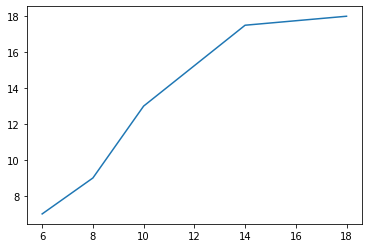

In [7]:
plt.plot(X, y)

## Linear Regression Formula

$ y = \alpha + \beta x $

## Best Fitting Line

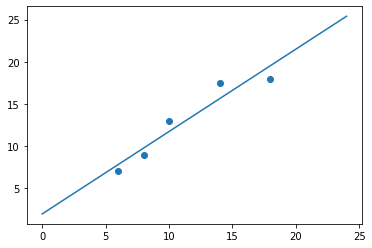

In [10]:
import numpy as np

plt.scatter(X, y)
plt.plot(np.arange(0, 25), model.predict(np.arange(0, 25).reshape(-1, 1)))

## Evaluating the fitness of a model with a cost function

In [11]:
print('Residual sum of squares: %.2f' % np.sum((model.predict(X) - y) ** 2))

Residual sum of squares: 8.75


$ R² = 1 - \frac{S S_{res}}{S S_{tot}} $

In [12]:
model.score(X, y)

0.9100015964240102

model.score, prediction'ın katsayısını bize gösterir.

## Multiple Linear Regression

$ Y = X \beta $ 

## Multiple Linear Regression Example - Advertising Dataset

In [13]:
import pandas as pd
data = pd.read_csv("Advertising.csv", index_col = 0)

In [14]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


pandas'ın read_csv modülü ile csv, txt, hdf gibi farklı dosya tipleri okunabilir. Bu okunan veriler bir pandas DataFrame'ine yazılır.

Text(0.5, 0, ' Newspaper')

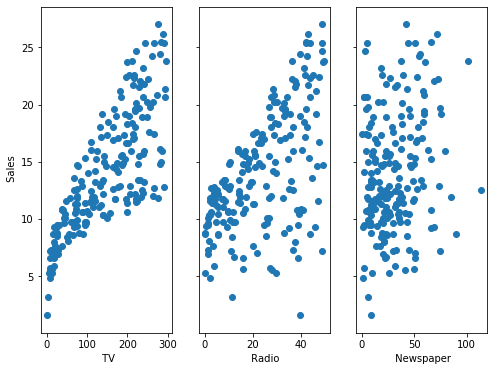

In [18]:
fig, axes = plt.subplots(1, 3, figsize = (8, 6), sharey = True)
axes[0].scatter(data.TV.values, data.Sales.values)
axes[0].set_xlabel(" TV")
axes[0].set_ylabel(" Sales")
axes[1].scatter(data.Radio.values, data.Sales.values)
axes[1].set_xlabel(" Radio")
axes[2].scatter(data.Newspaper.values, data.Sales.values)
axes[2].set_xlabel(" Newspaper")

$ sales = \beta_0 + \beta_1 x TV + \beta_2 x Radio + \beta_3 x Newspaper + \epsilon_0 $

In [20]:
lm = LinearRegression()
features = ["TV", "Radio", "Newspaper"]
x = data[features]
y = data.Sales
model = lm.fit(x, y)
print("model coefficients are: ")
print(model.coef_)
xpredicted = model.predict(x)
print("R-squared of the model: ")
model.score(x, y)

model coefficients are: 
[ 0.04576465  0.18853002 -0.00103749]
R-squared of the model: 


0.8972106381789521

## Cross Validation

Overfitting yapmamak için kullanılır. Küçük boyutlu datalarda makine öğrenmesi modelini eğitmede kullanılır. Train ve test setlere ayrılan data, kendi içinde kontrol edilmiş olunur.

In [21]:
lm = LinearRegression()
features = ["TV", "Radio", "Newspaper"]
x = data[features]
y = data.Sales

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print("the length of training size is %d" % len(X_train))
print("the length of test size is %d" % len(X_test))

model = lm.fit(X_train, y_train)
print("R-squared of the model: %.2f " % model.score(X_test, y_test))

the length of training size is 150
the length of test size is 50
R-squared of the model: 0.86 


In [23]:
for i in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
    model = lm.fit(X_train, y_train)
    print(model.score(X_test, y_test))

0.8634521485748908
0.9101014141963826
0.8842375232369923
0.8351762253652392
0.9211802282599247
0.8722087754915184
0.8391529122595411
0.9127101225092754
0.7958289687166555
0.8831997644726958


for döngüsü ile testi yaptırıp print ettirdik. Burada mesela 0.91 çok yüksekken 0.83 çok düşük, o sebeple mean alabiliriz. Ya da K-Fold Cross-Validation kullanırız.

## K-Fold Cross-Validation

K-Fold Cross-Validation makine öğrenmesinde sıkça kullanılan bir cross validation metodudur.

k consecutive fold oluşturulur ve k-1 fold lar training set oluştururken, diğer fold lar ise validation için kullanılır.

In [24]:
x = x[:40]

In [25]:
y = y[:40]

In [27]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 4)
for train, test in kf.split(x, y):
    print(train, test)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39] [0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39] [10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 30 31 32 33
 34 35 36 37 38 39] [20 21 22 23 24 25 26 27 28 29]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] [30 31 32 33 34 35 36 37 38 39]


In [28]:
x = data[features]
y = data.Sales
kf = KFold(n_splits = 10)
scores = []
for train,test in kf.split(x, y):
    model = lm.fit(x.values[train], y.values[train])
    score = model.score(x.values[test], y.values[test])
    print(score)
    scores.append(score)

print("the mean score for %d-fold cross validation is %.2f" % (kf.get_n_splits(), np.mean(np.array(scores))))

0.8730269590985928
0.8581613040148899
0.9296872316691296
0.8901327151837942
0.9314649771656575
0.9313873454259836
0.7597900975397525
0.912170969514483
0.8389175289923594
0.9288231093749743
the mean score for 10-fold cross validation is 0.89
